In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df=pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [16]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [17]:
df['date'] = pd.to_datetime(df['date'])

In [18]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [19]:
df.drop('date', axis=1, inplace=True)

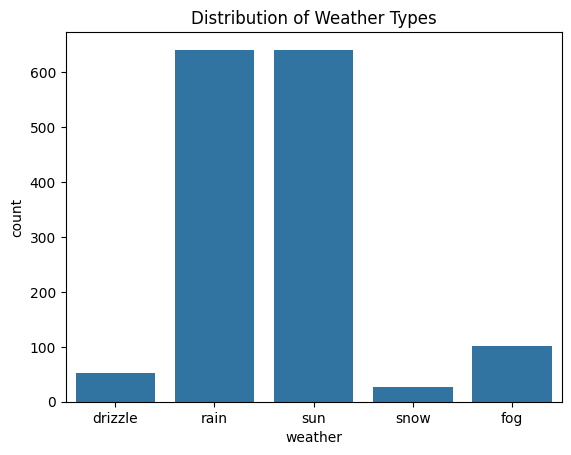

In [20]:
sns.countplot(x='weather', data=df)
plt.title('Distribution of Weather Types')
plt.show()

In [23]:
numerical_df = df.select_dtypes(include=[np.number])

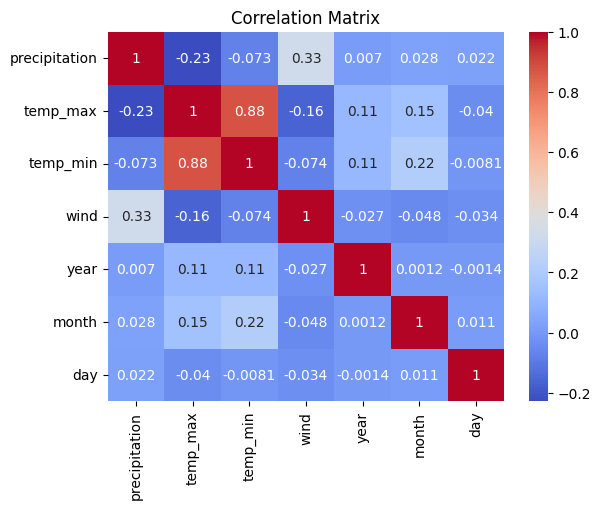

In [25]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
df['rain'] = df['weather'].apply(lambda x: 1 if x == 'rain' else 0)

In [27]:
df.drop('weather', axis=1, inplace=True)

In [28]:
X = df.drop('rain', axis=1)
y = df['rain']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [33]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       173
           1       0.95      0.93      0.94       120

    accuracy                           0.95       293
   macro avg       0.95      0.95      0.95       293
weighted avg       0.95      0.95      0.95       293

Accuracy: 0.9488054607508533


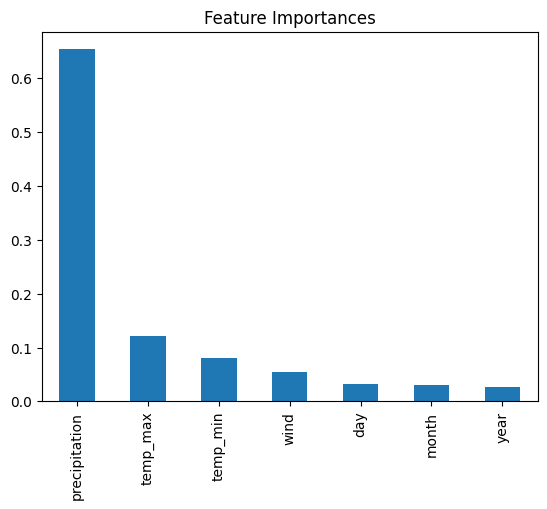

In [35]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [39]:
example = pd.DataFrame({
    'precipitation': [0.1],
    'temp_max': [12.8],
    'temp_min': [5.0],
    'wind': [4.7],
    'year': [2012],
    'month': [1],
    'day': [1]
})

prediction = model.predict(example)
print(f'Prediction: {"Rain" if prediction[0] == 1 else "No Rain"}')

Prediction: No Rain
